In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
# Load your CSV
df = pd.read_csv("stats_output.csv")

# Define metrics and their labels
metrics = ['AvgProfit', 'WinRate', 'ProfitPerDay']
labels = {
    'AvgProfit': 'Average Profit',
    'WinRate': 'Winning Percentage',
    'ProfitPerDay': 'Profit per Day'
}




In [4]:
df

,Label,RiskLevel,AvgProfit,AvgHoldDays,ProfitPerDay,WinRate,AvgProfitLong,AvgHoldLong,ProfitPerDayLong,WinRateLong,AvgProfitShort,AvgHoldShort,ProfitPerDayShort,WinRateShort
0,stocks,1,-0.214411,1.0,-0.214411,44.243070,-0.366871,1.0,-0.366871,38.657407,-0.084247,1.0,-0.084247,49.011858
1,etfs,1,-0.247954,1.0,-0.247954,42.763158,-0.440933,1.0,-0.440933,45.000000,-0.097189,1.0,-0.097189,41.015625
2,combined,1,-0.225383,1.0,-0.225383,43.758967,-0.390308,1.0,-0.390308,40.664557,-0.088595,1.0,-0.088595,46.325459
3,stocks,2,-0.125456,2.0,-0.062728,49.680171,-0.105297,2.0,-0.052648,47.916667,-0.142668,2.0,-0.071334,51.185771
4,etfs,2,-0.304300,2.0,-0.152150,44.517544,-0.569774,2.0,-0.284887,48.500000,-0.096898,2.0,-0.048449,41.406250
5,combined,2,-0.183959,2.0,-0.091980,47.991392,-0.252283,2.0,-0.126142,48.101266,-0.127291,2.0,-0.063646,47.900262
6,stocks,3,-0.105030,3.0,-0.035010,50.319829,0.087349,3.0,0.029116,53.240741,-0.269274,3.0,-0.089758,47.826087
7,etfs,3,-0.184831,3.0,-0.061610,46.710526,-0.374609,3.0,-0.124870,51.500000,-0.036567,3.0,-0.012189,42.968750
8,combined,3,-0.131134,3.0,-0.043711,49.139168,-0.058841,3.0,-0.019614,52.689873,-0.191094,3.0,-0.063698,46.194226
9,stocks,5,-0.242991,5.0,-0.048598,48.294243,-0.094940,5.0,-0.018988,50.925926,-0.369390,5.0,-0.073878,46.047431


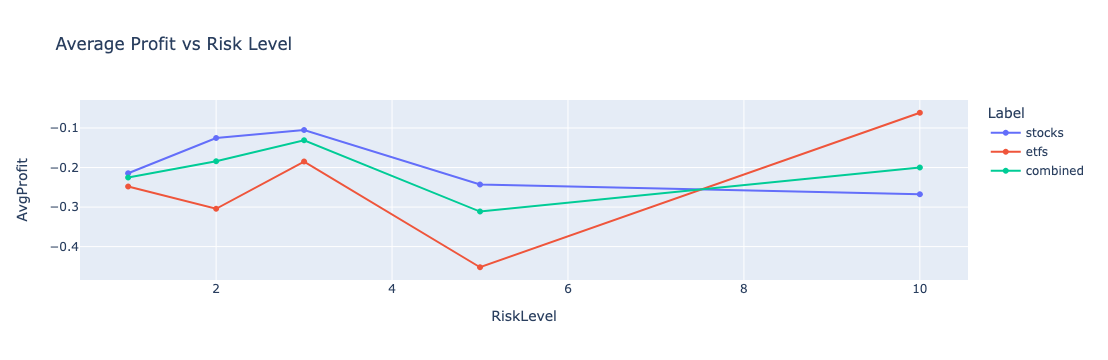

In [15]:
import plotly.express as px

fig = px.line(df, x='RiskLevel', y='AvgProfit', color='Label',
              markers=True, title='Average Profit vs Risk Level')
fig.show()

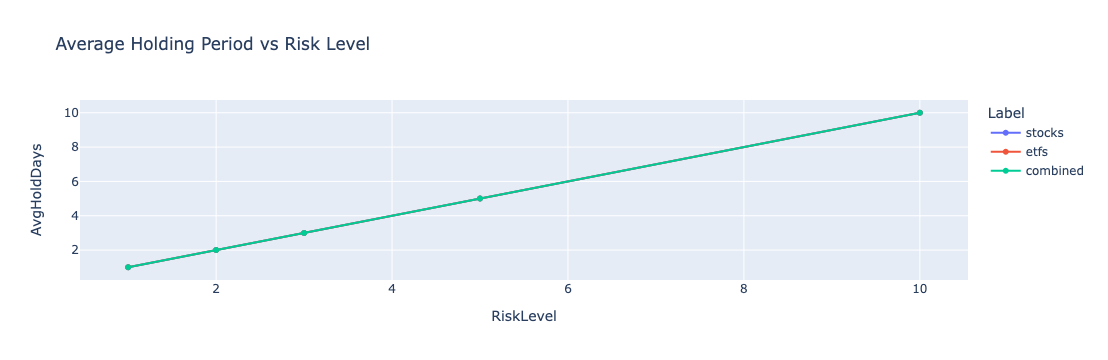

In [16]:
fig = px.line(df, x='RiskLevel', y='AvgHoldDays', color='Label',
              markers=True, title='Average Holding Period vs Risk Level')
fig.show()


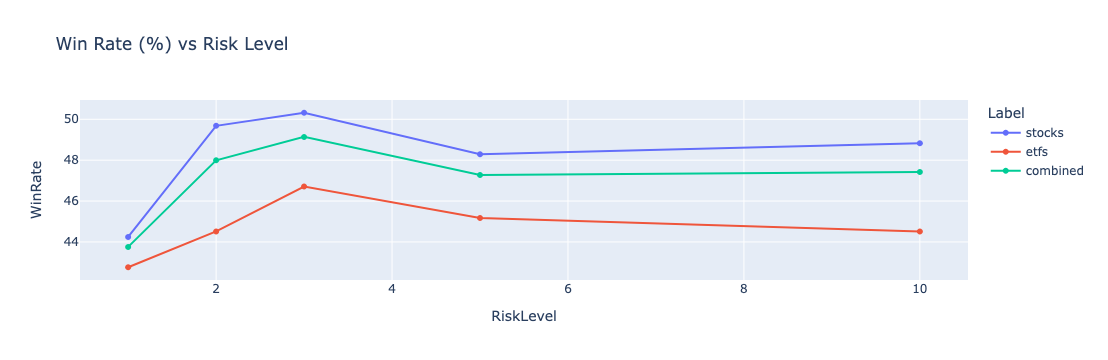

In [17]:
fig = px.line(df, x='RiskLevel', y='WinRate', color='Label',
              markers=True, title='Win Rate (%) vs Risk Level')
fig.show()

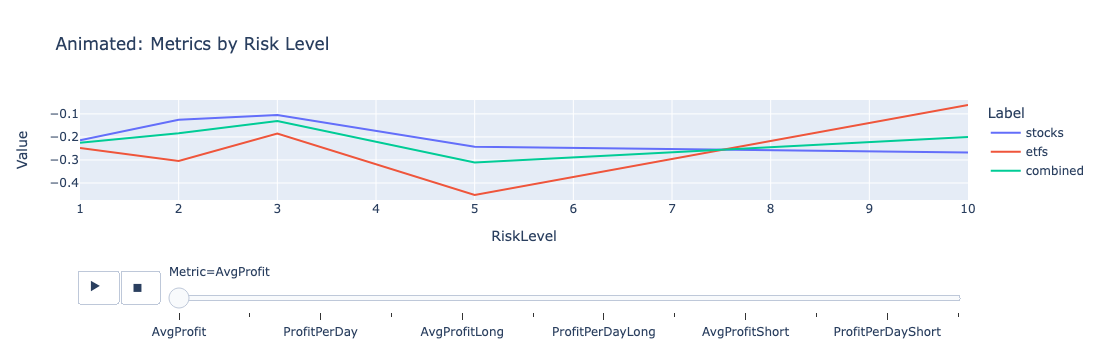

In [19]:
# Reshape for animation
melted = df.melt(id_vars=['Label', 'RiskLevel'], var_name='Metric', value_name='Value')

fig = px.line(melted, x='RiskLevel', y='Value', color='Label',
              animation_frame='Metric', title='Animated: Metrics by Risk Level')
fig.show()

In [18]:
# Reshape data
long_short = df.melt(id_vars=['Label', 'RiskLevel'], 
                     value_vars=['ProfitPerDayLong', 'ProfitPerDayShort'],
                     var_name='TradeType', value_name='ProfitPerDay')

# Clean label
long_short['TradeType'] = long_short['TradeType'].str.replace('ProfitPerDay', '')

fig = px.bar(long_short, x='RiskLevel', y='ProfitPerDay', color='TradeType',
             barmode='group', facet_col='Label', title='Profit per Day: Long vs Short')
fig.show()


ValueError: value_name (ProfitPerDay) cannot match an element in the DataFrame columns.

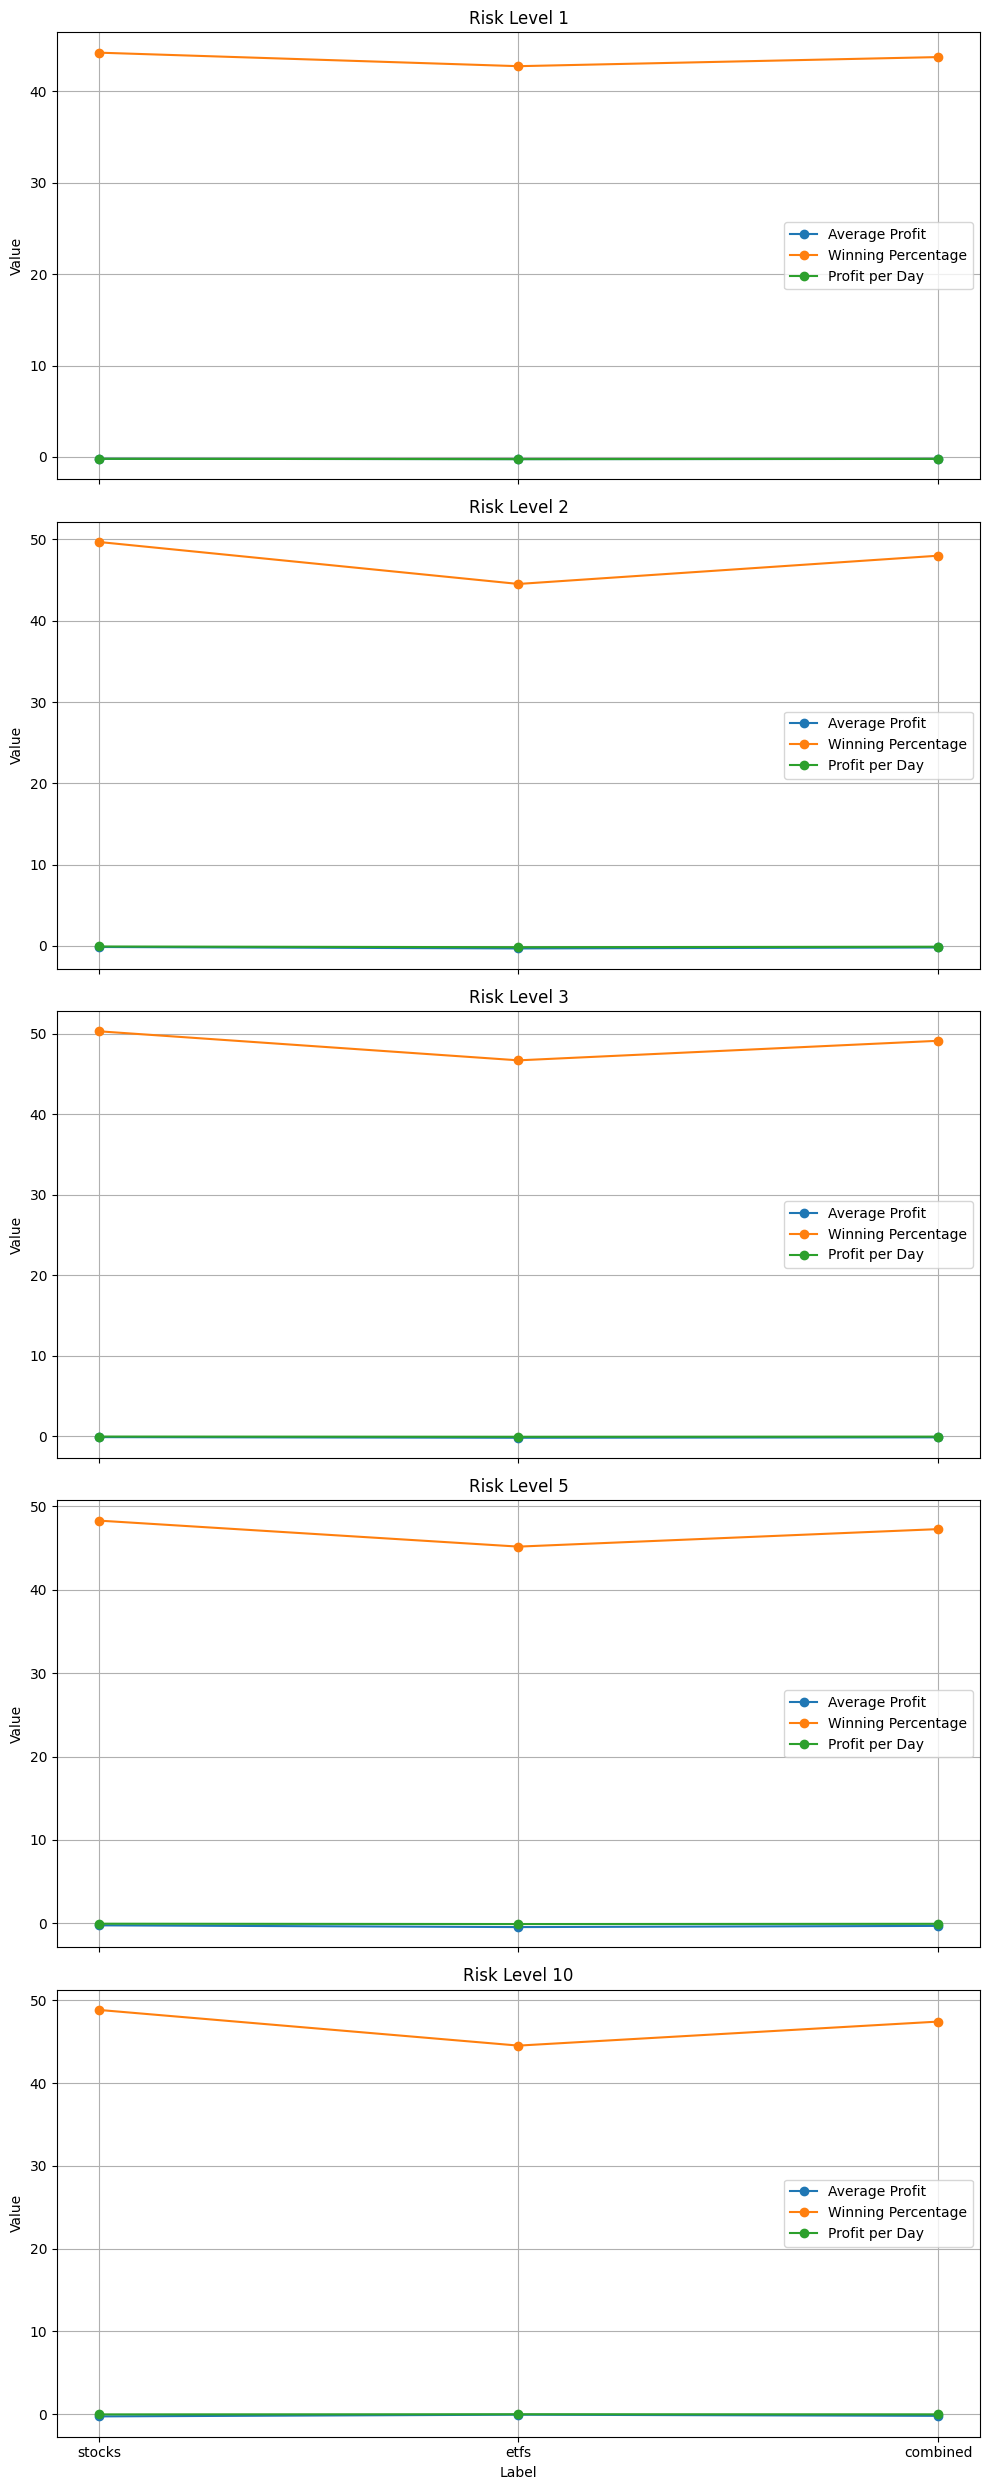

In [3]:
# Get unique risk levels
risk_levels = sorted(df['RiskLevel'].unique())

# Create subplots (one per risk level)
fig, axes = plt.subplots(len(risk_levels), 1, figsize=(10, 5 * len(risk_levels)), sharex=True)

# Plot each risk level
for i, risk in enumerate(risk_levels):
    ax = axes[i]
    subset = df[df['RiskLevel'] == risk]
    
    for metric in metrics:
        ax.plot(subset['Label'], subset[metric], marker='o', label=labels[metric])
    
    ax.set_title(f"Risk Level {risk}")
    ax.set_ylabel("Value")
    ax.legend()
    ax.grid(True)

plt.xlabel("Label")
plt.tight_layout()
plt.show()

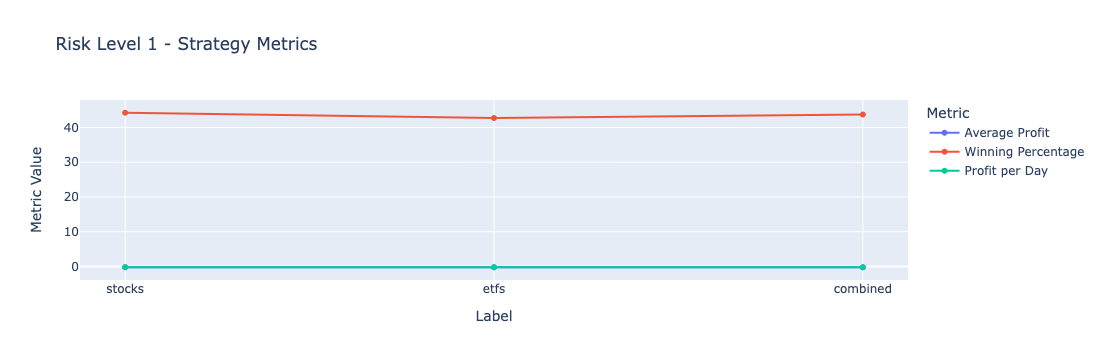

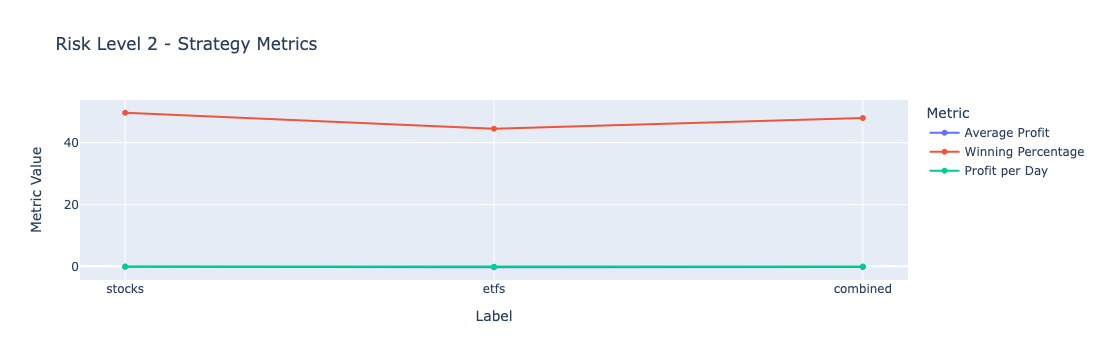

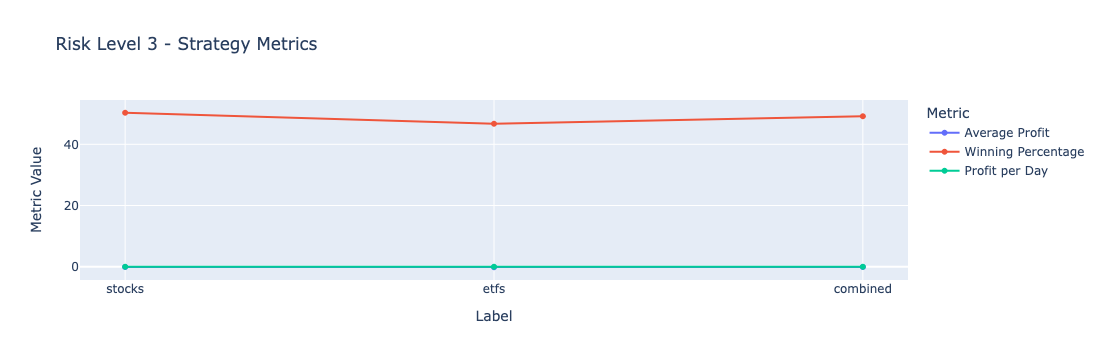

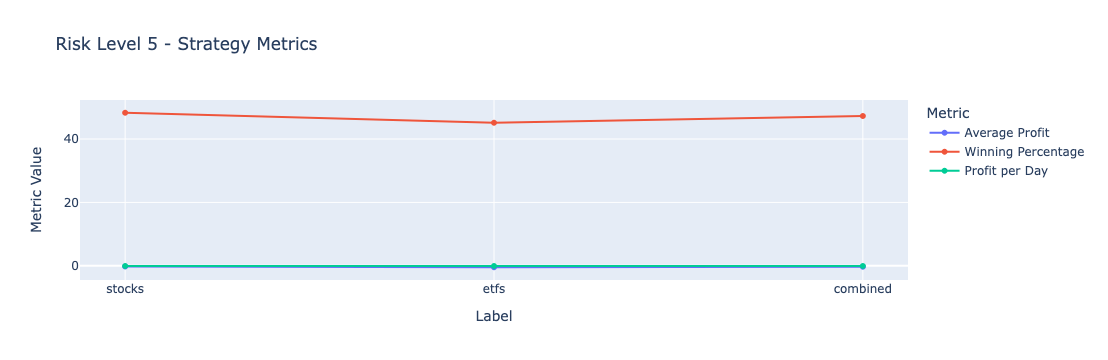

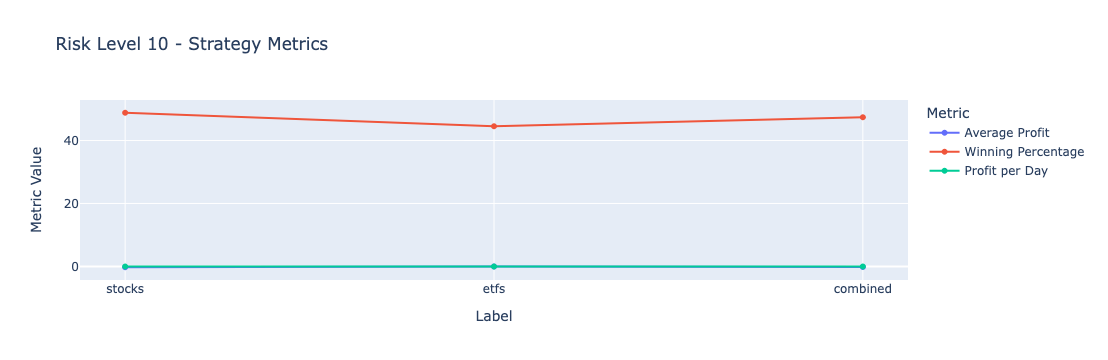

In [8]:
# Create one interactive plot per risk level
metrics = {
    'AvgProfit': 'Average Profit',
    'WinRate': 'Winning Percentage',
    'ProfitPerDay': 'Profit per Day'
}

for risk in sorted(df['RiskLevel'].unique()):
    subset = df[df['RiskLevel'] == risk]
    
    # Melt the DataFrame to long format for plotly express
    melted = subset.melt(id_vars='Label', value_vars=list(metrics.keys()),
                         var_name='Metric', value_name='Value')
    
    # Map readable metric names
    melted['Metric'] = melted['Metric'].map(metrics)

    fig = px.line(
        melted,
        x='Label',
        y='Value',
        color='Metric',
        markers=True,
        title=f"Risk Level {risk} - Strategy Metrics"
    )
    
    fig.update_layout(
        xaxis_title='Label',
        yaxis_title='Metric Value',
        hovermode='x unified'
    )
    
    fig.show()


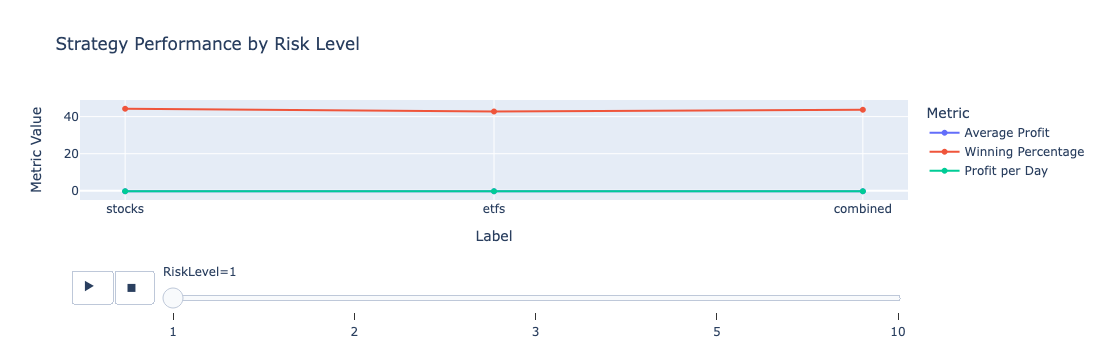

In [9]:
melted = df.melt(id_vars=['Label', 'RiskLevel'], 
                 value_vars=list(metrics.keys()), 
                 var_name='Metric', 
                 value_name='Value')

# Map readable names
melted['Metric'] = melted['Metric'].map(metrics)

# Plot with animation
fig = px.line(
    melted,
    x="Label",
    y="Value",
    color="Metric",
    line_group="Metric",
    animation_frame="RiskLevel",
    markers=True,
    title="Strategy Performance by Risk Level"
)

fig.update_layout(
    xaxis_title="Label",
    yaxis_title="Metric Value",
    hovermode="x unified"
)

fig.show()


In [10]:
metrics_to_plot = [
    'AverageProfit', 'AverageHoldingPeriod', 'AverageProfitPerDay',
    'AverageProfitLong', 'AverageHoldingPeriodLong', 'AverageProfitPerDayLong',
    'AverageProfitShort', 'AverageHoldingPeriodShort', 'AverageProfitPerDayShort'
]

fig = px.bar(
    df[df['Metric'].isin(metrics_to_plot)],
    x='Label',
    y='Value',
    color='Metric',
    barmode='group',
    facet_col='RiskLevel',
    title='Trade Statistics (excluding Winning Percent)',
    height=600
)
fig.show()

KeyError: 'Metric'

In [11]:
Index(['Label', 'RiskLevel', 'averageProfit', 'averageHoldingPeriod', ...], dtype='object')

NameError: name 'Index' is not defined

In [12]:
df.columns

Index(['Label', 'RiskLevel', 'AvgProfit', 'AvgHoldDays', 'ProfitPerDay',
       'WinRate', 'AvgProfitLong', 'AvgHoldLong', 'ProfitPerDayLong',
       'WinRateLong', 'AvgProfitShort', 'AvgHoldShort', 'ProfitPerDayShort',
       'WinRateShort'],
      dtype='object')

In [13]:
df_long = df.melt(
    id_vars=['Label', 'RiskLevel'], 
    var_name='Metric', 
    value_name='Value'
)

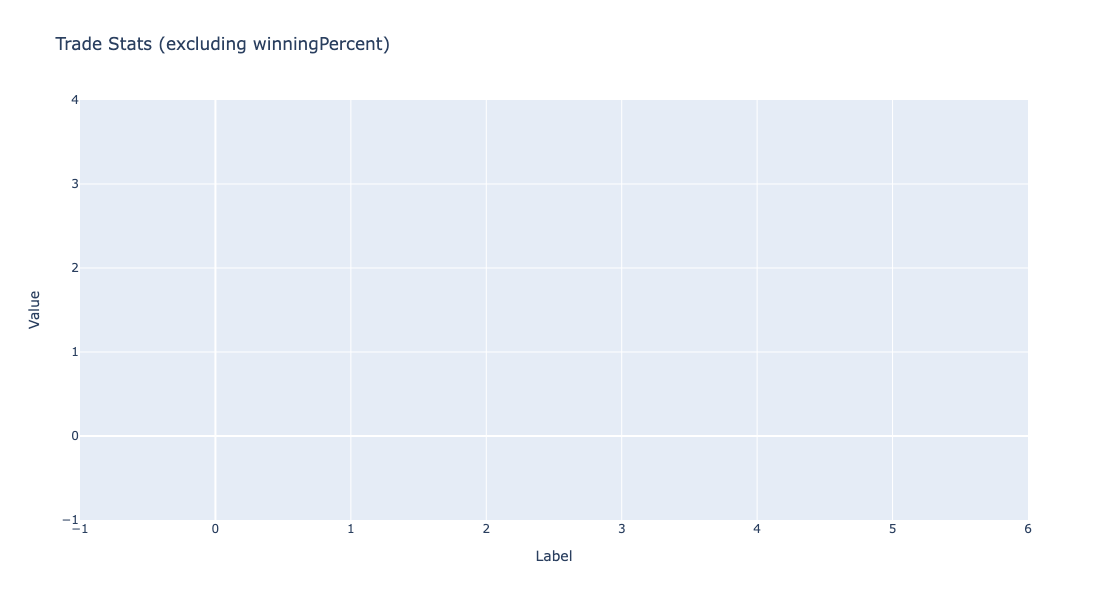

In [14]:
metrics_to_plot = [
    'averageProfit', 'averageHoldingPeriod', 'averageProfitPerDay',
    'averageProfitLong', 'averageHoldingPeriodLong', 'averageProfitPerDayLong',
    'averageProfitShort', 'averageHoldingPeriodShort', 'averageProfitPerDayShort'
]

fig = px.bar(
    df_long[df_long['Metric'].isin(metrics_to_plot)],
    x='Label',
    y='Value',
    color='Metric',
    barmode='group',
    facet_col='RiskLevel',
    title='Trade Stats (excluding winningPercent)',
    height=600
)
fig.show()

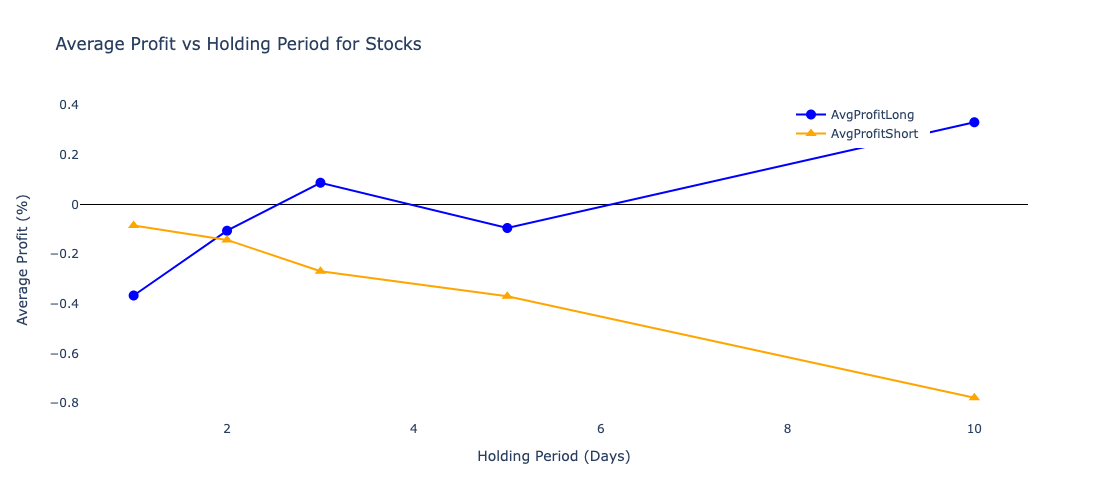

In [20]:
import pandas as pd
import plotly.graph_objects as go

# Load the CSV
df = pd.read_csv("stats_output.csv")

# Filter for just the 'stocks' rows
df_stocks = df[df['Label'] == 'stocks'].copy()
df_stocks = df_stocks.sort_values(by='RiskLevel')

# Create figure
fig = go.Figure()

# Plot AvgProfitLong
fig.add_trace(go.Scatter(
    x=df_stocks['RiskLevel'],
    y=df_stocks['AvgProfitLong'],
    mode='lines+markers',
    name='AvgProfitLong',
    marker=dict(symbol='circle', size=10, color='blue')
))

# Plot AvgProfitShort
fig.add_trace(go.Scatter(
    x=df_stocks['RiskLevel'],
    y=df_stocks['AvgProfitShort'],
    mode='lines+markers',
    name='AvgProfitShort',
    marker=dict(symbol='triangle-up', size=10, color='orange')
))

# Update layout
fig.update_layout(
    title='Average Profit vs Holding Period for Stocks',
    xaxis_title='Holding Period (Days)',
    yaxis_title='Average Profit (%)',
    plot_bgcolor='white',
    width=900,
    height=500,
    legend=dict(x=0.75, y=1)
)

fig.update_yaxes(showgrid=True, zeroline=True, zerolinewidth=1, zerolinecolor='black')
fig.update_xaxes(showgrid=False)

fig.show()


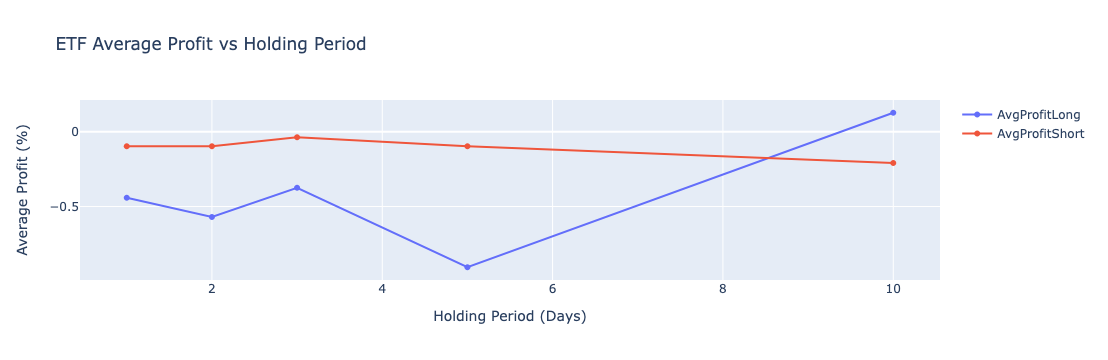

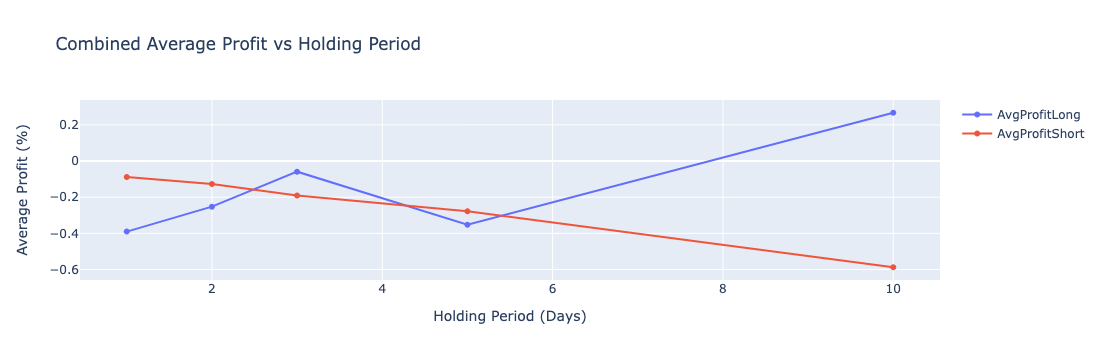

In [21]:
df_etf = df[df['Label'] == 'etfs'].sort_values(by='RiskLevel')
df_combined = df[df['Label'] == 'combined'].sort_values(by='RiskLevel')

# Plot for ETFs
fig_etf = go.Figure()
fig_etf.add_trace(go.Scatter(x=df_etf['RiskLevel'], y=df_etf['AvgProfitLong'],
                             mode='lines+markers', name='AvgProfitLong'))
fig_etf.add_trace(go.Scatter(x=df_etf['RiskLevel'], y=df_etf['AvgProfitShort'],
                             mode='lines+markers', name='AvgProfitShort'))
fig_etf.update_layout(title='ETF Average Profit vs Holding Period',
                      xaxis_title='Holding Period (Days)', yaxis_title='Average Profit (%)')

# Plot for Combined
fig_combined = go.Figure()
fig_combined.add_trace(go.Scatter(x=df_combined['RiskLevel'], y=df_combined['AvgProfitLong'],
                                  mode='lines+markers', name='AvgProfitLong'))
fig_combined.add_trace(go.Scatter(x=df_combined['RiskLevel'], y=df_combined['AvgProfitShort'],
                                  mode='lines+markers', name='AvgProfitShort'))
fig_combined.update_layout(title='Combined Average Profit vs Holding Period',
                           xaxis_title='Holding Period (Days)', yaxis_title='Average Profit (%)')

fig_etf.show()
fig_combined.show()